In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# TASK 1: tokanisation and validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [8]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [9]:
positive_counts.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [11]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.07753744390572),
 ('felix', 3.152736022363656),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.80672172860924),
 ('victoria', 2.681021528714291),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.538973871058276),
 ('flawless', 2.451005098112319),
 ('superbly', 2.26002547857525),
 ('perfection', 2.159484249353372),
 ('astaire', 2.1400661634962708),
 ('captures', 2.038619547159581),
 ('voight', 2.030170492673053),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('soccer', 1.757857

In [12]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.07781526027089),
 ('uwe', -3.921875301871158),
 ('seagal', -3.320250105858192),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.775383321170797),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.371577964480997),
 ('pointless', -2.345107387713634),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.247602958576693),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488),
 ('poorly', -2.132613384420701),
 ('wasting', -2.117815554561451),
 ('remotely', -2.111046881095167),
 ('existent', -2.0024805005437076),
 ('boredom', -1.9241486572738005),
 ('miserably', -1.921661093801999),
 ('sucks', -1.9166645809588516),
 ('uninspired', -1.9131499212248517),
 ('lame', -1.9117232884159072),
 ('insult'

# Transforming Text into Numbers

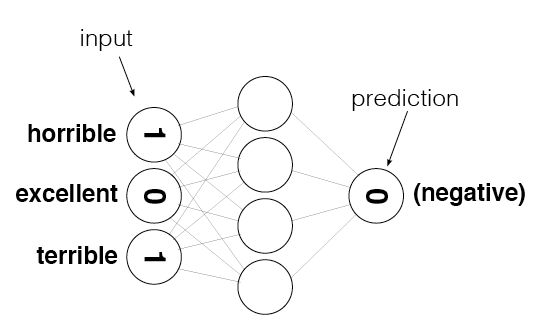

In [13]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

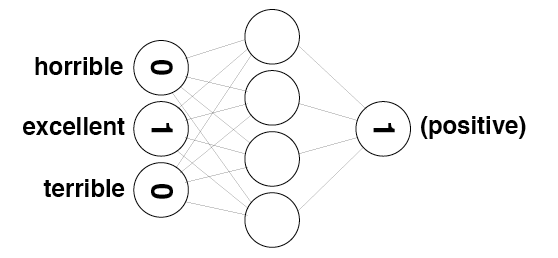

In [14]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Creating the Input/Output Data

In [29]:
try:
    import urllib.request as urllib2
except ImportError:
    import urllib2
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import nltk


word_sent = word_tokenize(reviews[5].lower())
print(word_sent)



['this', 'film', 'lacked', 'something', 'i', 'couldn', 't', 'put', 'my', 'finger', 'on', 'at', 'first', 'charisma', 'on', 'the', 'part', 'of', 'the', 'leading', 'actress', '.', 'this', 'inevitably', 'translated', 'to', 'lack', 'of', 'chemistry', 'when', 'she', 'shared', 'the', 'screen', 'with', 'her', 'leading', 'man', '.', 'even', 'the', 'romantic', 'scenes', 'came', 'across', 'as', 'being', 'merely', 'the', 'actors', 'at', 'play', '.', 'it', 'could', 'very', 'well', 'have', 'been', 'the', 'director', 'who', 'miscalculated', 'what', 'he', 'needed', 'from', 'the', 'actors', '.', 'i', 'just', 'don', 't', 'know', '.', 'br', 'br', 'but', 'could', 'it', 'have', 'been', 'the', 'screenplay', 'just', 'exactly', 'who', 'was', 'the', 'chef', 'in', 'love', 'with', 'he', 'seemed', 'more', 'enamored', 'of', 'his', 'culinary', 'skills', 'and', 'restaurant', 'and', 'ultimately', 'of', 'himself', 'and', 'his', 'youthful', 'exploits', 'than', 'of', 'anybody', 'or', 'anything', 'else', '.', 'he', 'neve

In [30]:
_stopwords = set(stopwords.words('english') + list(punctuation))
print(_stopwords)



{'through', 't', '+', 'no', 'here', 'your', 'below', ']', '}', 'which', '#', 'been', 'than', '~', "haven't", 'down', '^', 'after', 'they', 'any', 'd', "you'd", '%', 'yourselves', 's', "wasn't", "shan't", "needn't", 'couldn', 'over', 'didn', 'itself', 'be', 'and', 'above', "'", '=', 'themselves', 'whom', 'or', 'those', 'now', '\\', 'don', "aren't", 'these', ':', 'then', '[', 'more', 'myself', 'he', 'this', 'aren', 'needn', 'from', 'as', 've', 'his', ',', '>', 'nor', 'can', "should've", 'isn', ';', 'having', 'only', 'him', 'its', 'during', 'wasn', 'was', '*', '{', "doesn't", 'them', 'is', 'm', 'if', "wouldn't", 'same', 'because', 'ain', 'both', "mightn't", 'himself', '&', '.', 'too', 'the', "she's", 'will', 'with', 'between', 'but', 'all', 'hasn', 'am', 'shouldn', 'y', 'doesn', "didn't", 'under', 'has', 'why', 'own', 'about', 'there', 'ours', 'shan', 'ourselves', 'a', 'll', '-', "isn't", 'her', '$', 'are', 'you', 'weren', "weren't", 'doing', 'o', 'did', 'mightn', 'before', "you're", 'who

In [31]:
word_sent =[word for word in word_sent if word not in _stopwords]
print(word_sent)

['film', 'lacked', 'something', 'put', 'finger', 'first', 'charisma', 'part', 'leading', 'actress', 'inevitably', 'translated', 'lack', 'chemistry', 'shared', 'screen', 'leading', 'man', 'even', 'romantic', 'scenes', 'came', 'across', 'merely', 'actors', 'play', 'could', 'well', 'director', 'miscalculated', 'needed', 'actors', 'know', 'br', 'br', 'could', 'screenplay', 'exactly', 'chef', 'love', 'seemed', 'enamored', 'culinary', 'skills', 'restaurant', 'ultimately', 'youthful', 'exploits', 'anybody', 'anything', 'else', 'never', 'convinced', 'love', 'princess', 'br', 'br', 'disappointed', 'movie', 'forget', 'nominated', 'oscar', 'judge']


In [32]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [33]:
list(vocab)

['',
 'ostensible',
 'accountants',
 'gourds',
 'medic',
 'bfg',
 'skinniest',
 'heavenlier',
 'cracks',
 'terrorized',
 'replenished',
 'destruct',
 'farscape',
 'dorfman',
 'bar',
 'sophomoronic',
 'pinnacles',
 'chirpy',
 'haugland',
 'eet',
 'cherished',
 'hallarious',
 'mcanally',
 'morocco',
 'citizenx',
 'sleekly',
 'mature',
 'meatheads',
 'amrique',
 'promulgated',
 'defence',
 'intersections',
 'groucho',
 'rycart',
 'ruth',
 'welfare',
 'preached',
 'bridesmaid',
 'darin',
 'saxaphone',
 'appelagate',
 'vitameatavegamin',
 'sacarstic',
 'ingram',
 'glenda',
 'spacek',
 'priggish',
 'frazzlingly',
 'annabella',
 'sobs',
 'dawns',
 'volcanic',
 'tyranny',
 'browsing',
 'parisiennes',
 'corneal',
 'furious',
 'preying',
 'crenna',
 'storr',
 'prevails',
 'denied',
 'negating',
 'righted',
 'mayhem',
 'highlighting',
 'shuddered',
 'huzoor',
 'lances',
 'fattened',
 'mazurski',
 'sensuousness',
 'dv',
 'annabelle',
 'caprica',
 'mcgill',
 'plumbers',
 'rima',
 'paints',
 'lunchr

In [34]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[0., 0., 0., ..., 0., 0., 0.]])

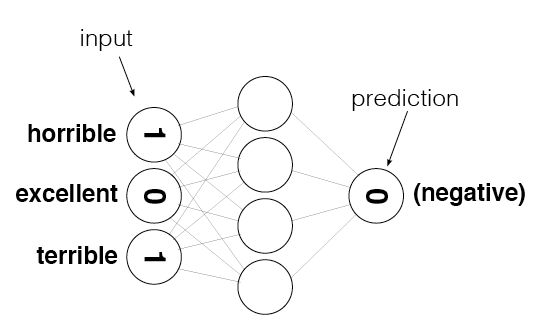

In [35]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [36]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'ostensible': 1,
 'accountants': 2,
 'gourds': 3,
 'medic': 4,
 'bfg': 5,
 'skinniest': 6,
 'heavenlier': 7,
 'cracks': 8,
 'terrorized': 9,
 'replenished': 10,
 'destruct': 11,
 'farscape': 12,
 'dorfman': 13,
 'bar': 14,
 'sophomoronic': 15,
 'pinnacles': 16,
 'chirpy': 17,
 'haugland': 18,
 'eet': 19,
 'cherished': 20,
 'hallarious': 21,
 'mcanally': 22,
 'morocco': 23,
 'citizenx': 24,
 'sleekly': 25,
 'mature': 26,
 'meatheads': 27,
 'amrique': 28,
 'promulgated': 29,
 'defence': 30,
 'intersections': 31,
 'groucho': 32,
 'rycart': 33,
 'ruth': 34,
 'welfare': 35,
 'preached': 36,
 'bridesmaid': 37,
 'darin': 38,
 'saxaphone': 39,
 'appelagate': 40,
 'vitameatavegamin': 41,
 'sacarstic': 42,
 'ingram': 43,
 'glenda': 44,
 'spacek': 45,
 'priggish': 46,
 'frazzlingly': 47,
 'annabella': 48,
 'sobs': 49,
 'dawns': 50,
 'volcanic': 51,
 'tyranny': 52,
 'browsing': 53,
 'parisiennes': 54,
 'corneal': 55,
 'furious': 56,
 'preying': 57,
 'crenna': 58,
 'storr': 59,
 'prevails'

In [37]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [38]:
layer_0

array([[18.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [40]:
labels[0]

'POSITIVE'

In [41]:
get_target_for_label(labels[0])

1

In [42]:
labels[1]

'NEGATIVE'

In [43]:
get_target_for_label(labels[1])

0

# Building a Neural Network

In [44]:
import time
import sys
import numpy as np

# Let's tweak our network from before to model these phenomena
class SentimentNetwork:
    def __init__(self, reviews,labels,hidden_nodes = 10, learning_rate = 0.1):
       
        # set our random number generator 
        np.random.seed(1)
    
        self.pre_process_data(reviews, labels)
        
        self.init_network(len(self.review_vocab),hidden_nodes, 1, learning_rate)
        
        
    def pre_process_data(self, reviews, labels):
        
        review_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                review_vocab.add(word)
        self.review_vocab = list(review_vocab)
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        self.label_vocab = list(label_vocab)
        
        self.review_vocab_size = len(self.review_vocab)
        self.label_vocab_size = len(self.label_vocab)
        
        self.word2index = {}
        for i, word in enumerate(self.review_vocab):
            self.word2index[word] = i
        
        self.label2index = {}
        for i, label in enumerate(self.label_vocab):
            self.label2index[label] = i
         
        
    def init_network(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
    
        self.weights_1_2 = np.random.normal(0.0, self.output_nodes**-0.5, 
                                                (self.hidden_nodes, self.output_nodes))
        
        self.learning_rate = learning_rate
        
        self.layer_0 = np.zeros((1,input_nodes))
    
        
    def update_input_layer(self,review):

        # clear out previous state, reset the layer to be all 0s
        self.layer_0 *= 0
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]] += 1
                
    def get_target_for_label(self,label):
        if(label == 'POSITIVE'):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    
    def train(self, training_reviews, training_labels):
        
        assert(len(training_reviews) == len(training_labels))
        
        correct_so_far = 0
        
        start = time.time()
        
        for i in range(len(training_reviews)):
            
            review = training_reviews[i]
            label = training_labels[i]
            
            #### Implement the forward pass here ####
            ### Forward pass ###

            # Input Layer
            self.update_input_layer(review)

            # Hidden layer
            layer_1 = self.layer_0.dot(self.weights_0_1)

            # Output layer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))

            #### Implement the backward pass here ####
            ### Backward pass ###

            # Output error
            layer_2_error = layer_2 - self.get_target_for_label(label) # Output layer error is the difference between desired target and actual output.
            layer_2_delta = layer_2_error * self.sigmoid_output_2_derivative(layer_2)

            # Backpropagated error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T) # errors propagated to the hidden layer
            layer_1_delta = layer_1_error # hidden layer gradients - no nonlinearity so it's the same as the error

            # Update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta) * self.learning_rate # update hidden-to-output weights with gradient descent step
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta) * self.learning_rate # update input-to-hidden weights with gradient descent step

            if(np.abs(layer_2_error) < 0.5):
                correct_so_far += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(training_reviews)))[:4] + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] + " #Correct:" + str(correct_so_far) + " #Trained:" + str(i+1) + " Training Accuracy:" + str(correct_so_far * 100 / float(i+1))[:4] + "%")
            if(i % 2500 == 0):
                print("")
    
    def test(self, testing_reviews, testing_labels):
        
        correct = 0
        
        start = time.time()
        
        for i in range(len(testing_reviews)):
            pred = self.run(testing_reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            
            reviews_per_second = i / float(time.time() - start)
            
            sys.stdout.write("\rProgress:" + str(100 * i/float(len(testing_reviews)))[:4] \
                             + "% Speed(reviews/sec):" + str(reviews_per_second)[0:5] \
                            + "% #Correct:" + str(correct) + " #Tested:" + str(i+1) + " Testing Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
    
    def run(self, review):
        
        # Input Layer
        self.update_input_layer(review.lower())

        # Hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)

        # Output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if(layer_2[0] > 0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [45]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.01)

In [47]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)

In [48]:
# train the network
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:0 #Trained:1 Training Accuracy:0.0%
Progress:10.4% Speed(reviews/sec):54.15 #Correct:1250 #Trained:2501 Training Accuracy:49.9%
Progress:20.8% Speed(reviews/sec):57.91 #Correct:2500 #Trained:5001 Training Accuracy:49.9%
Progress:31.2% Speed(reviews/sec):59.13 #Correct:3750 #Trained:7501 Training Accuracy:49.9%
Progress:41.6% Speed(reviews/sec):59.60 #Correct:5000 #Trained:10001 Training Accuracy:49.9%
Progress:52.0% Speed(reviews/sec):59.64 #Correct:6250 #Trained:12501 Training Accuracy:49.9%
Progress:62.5% Speed(reviews/sec):59.84 #Correct:7500 #Trained:15001 Training Accuracy:49.9%
Progress:72.9% Speed(reviews/sec):60.13 #Correct:8750 #Trained:17501 Training Accuracy:49.9%
Progress:83.3% Speed(reviews/sec):60.28 #Correct:10000 #Trained:20001 Training Accuracy:49.9%
Progress:93.7% Speed(reviews/sec):60.28 #Correct:11250 #Trained:22501 Training Accuracy:49.9%
Progress:99.9% Speed(reviews/sec):60.23 #Correct:11999 #Trained:24000 Training Acc

In [49]:
# evaluate our model before training (just to show how horrible it is)
mlp.test(reviews[-1000:],labels[-1000:])

Progress:99.9% Speed(reviews/sec):545.6% #Correct:500 #Tested:1000 Testing Accuracy:50.0%